Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       0.83      0.71      0.77        21
     class_2       0.62      0.71      0.67        14

    accuracy                           0.81        54
   macro avg       0.80      0.81      0.80        54
weighted avg       0.82      0.81      0.81        54



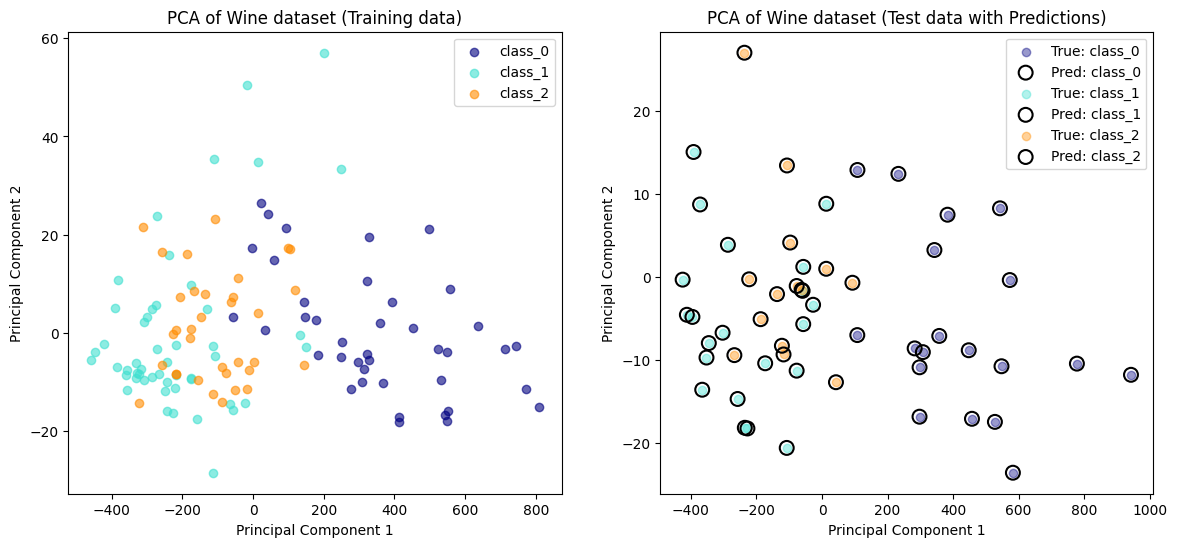

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target
target_names = wine.target_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use PCA to reduce the dataset to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Train the classifier on the PCA-reduced training data
gnb_classifier.fit(X_train_pca, y_train)

# Make predictions on the PCA-reduced test data
y_pred = gnb_classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Visualize the PCA-reduced data
plt.figure(figsize=(14, 6))

# Training set visualization
plt.subplot(1, 2, 1)
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], color=color, alpha=0.6, label=target_name)
plt.title('PCA of Wine dataset (Training data)')
plt.legend(loc='best')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Test set visualization with predictions
plt.subplot(1, 2, 2)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    # Plot the true labels
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], color=color, alpha=0.4, label=f'True: {target_name}')

    # Highlight predictions with a distinct marker
    plt.scatter(X_test_pca[y_pred == i, 0], X_test_pca[y_pred == i, 1], edgecolor='k', marker='o',
                facecolors='none', s=100, linewidths=1.5, label=f'Pred: {target_name}')

plt.title('PCA of Wine dataset (Test data with Predictions)')
plt.legend(loc='best')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


In [4]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1